In [ ]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import math as mat
from sklearn.preprocessing import StandardScaler
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from sklearn.datasets import make_swiss_roll

In [ ]:
import numpy as np
from numpy import pi
# import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("spiral_train.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')


In [ ]:
N1 = 200
N2 = 300

theta1 = np.sqrt(np.random.rand(N1))*2*pi # np.linspace(0,2*pi,100)
theta2 = np.sqrt(np.random.rand(N2))*2*pi

r_a = 2*theta1 + pi
data_a = np.array([np.cos(theta1)*r_a, np.sin(theta1)*r_a]).T
x_a = data_a + np.random.randn(N1,2)

r_b = -2*theta2 - pi
data_b = np.array([np.cos(theta2)*r_b, np.sin(theta2)*r_b]).T
x_b = data_b + np.random.randn(N2,2)

res_a = np.append(x_a, np.zeros((N1,1)), axis=1)
res_b = np.append(x_b, np.ones((N2,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("spiral_test.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving swissroll.csv to swissroll (1).csv


In [ ]:
import pandas as pd
import io
df_spiral = pd.read_csv(io.StringIO(uploaded['swissroll.csv'].decode('utf-8')),header=None, names=['x','y','z','label'])

In [ ]:
#df_spiral_test = pd.read_csv(io.StringIO(uploaded['spiral_test.csv'].decode('utf-8')),header=0)

In [ ]:
needed_columns = ['x', 'y', 'z']

#needed_columns_test = ['x', 'y']

In [ ]:
a = df_spiral.loc[df_spiral.label == 1,'x']
b = df_spiral.loc[df_spiral.label == 1,'y']
c = df_spiral.loc[df_spiral.label == 1,'z']

p = df_spiral.loc[df_spiral.label == 2,'x']
q = df_spiral.loc[df_spiral.label == 2,'y']
r = df_spiral.loc[df_spiral.label == 2,'z']


g = df_spiral.loc[df_spiral.label == 3,'x']
h = df_spiral.loc[df_spiral.label == 3,'y']
i = df_spiral.loc[df_spiral.label == 3,'z']


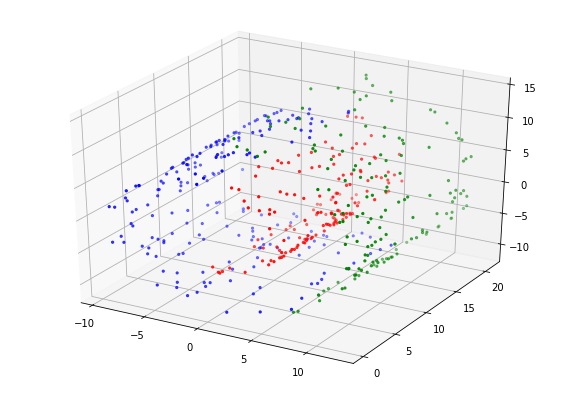

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(a,b,c, color = 'r',s=5)
ax.scatter3D(p,q,r, color = 'b',s=5)
ax.scatter3D(g,h,i, color = 'g',s=5)
#ax.scatter3D(df_spiral.loc[df_spiral.label == 2,'x'],df_spiral.loc[df_spiral.label == 2,'y'],df_spiral.loc[df_spiral.label == 2,'z'], c= 'b',s=5)

In [ ]:
print(df_spiral.head(5))

          x          y         z  label
0  0.027450   0.854087 -4.718127      1
1  0.034979   7.521696 -4.719671      1
2  0.073561  16.691014 -4.727376      1
3  0.080694  19.727268 -4.728763      1
4  0.158272  19.547271 -4.743105      1


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as preprocessing

In [ ]:
X = df_spiral[needed_columns]
Y = df_spiral['label']

In [ ]:
class Network(nn.Module):
    def __init__(self,num_in):
        super(Network, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(num_in, 16),
            nn.LeakyReLU(),
            nn.Linear(16, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 16),
            nn.LeakyReLU(),
            nn.Linear(16, num_in),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded



In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(X, Y, test_size = 0.3, random_state = None)

In [ ]:
from scipy.spatial import distance_matrix
A_train = pd.DataFrame(distance_matrix(X_train, X_train), index=X_train.index, columns=X_train.index)
D_train = nx.from_pandas_adjacency(A_train)
T_train = nx.minimum_spanning_tree(D_train)
G_train = nx.to_numpy_matrix(T_train)
B_train = nx.floyd_warshall_numpy(T_train)
MST_train = np.squeeze(np.asarray(B_train)) 

In [ ]:
A_val = pd.DataFrame(distance_matrix(X_val, X_val), index=X_val.index, columns=X_val.index)
D_val = nx.from_pandas_adjacency(A_val)
T_val = nx.minimum_spanning_tree(D_val)
G_val = nx.to_numpy_matrix(T_val)
B_val = nx.floyd_warshall_numpy(T_val)
MST_val = np.squeeze(np.asarray(B_val))

In [ ]:
scaler = preprocessing.RobustScaler()

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.utils.data as data_utils
import torch

In [ ]:
print(torch.Tensor(X_train.values).shape)

torch.Size([350, 3])


In [ ]:
print(B_val.shape)

(150, 150)


In [ ]:
X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
train = data_utils.TensorDataset(torch.Tensor(X_train), torch.Tensor(Y_train.values), torch.from_numpy(B_train))
train_dataloader = data_utils.DataLoader(train, batch_size=8, shuffle=False, drop_last=False)
val = data_utils.TensorDataset(torch.Tensor(X_val), torch.Tensor(Y_val.values), torch.from_numpy(B_val))
val_dataloader = data_utils.DataLoader(val, batch_size=8, shuffle=False, drop_last=False)


In [ ]:
loss_fn = nn.SmoothL1Loss(beta=0.3)

In [ ]:
def train(dataloader, model, optimizer):
    print("Learning Rate: ", optimizer.param_groups[0]["lr"])

    size = len(dataloader.dataset)
    model.train()
    accumulated_loss1 = 0
    #accumulated_reg_loss_train = 0
    #accumulated_class_loss_train = 0
    #accumulated_energy_loss = 0

    for batch, (X, y, M) in enumerate(dataloader):
        X, y = X, y
        y = y.squeeze()  # torch.Tensor(y.squeeze().tolist())
        optimizer.zero_grad()
        #print(X.shape)

        X_hat = model(X)
        encoder_op = model.encoder(X)
        loss1 = loss_fn(X_hat, X)

        encoded_op = model.encoder(X)
        dist_matrix = torch.cdist(encoded_op, encoded_op, p=2.0, compute_mode='use_mm_for_euclid_dist_if_necessary')
        loss2 = loss_fn(dist_matrix, M[:,:dist_matrix.shape[1]])
        #print("batch:", batch)
        #print(config.batch_size[j])

        # e_loss = ener_loss(energy_pred.squeeze(),energy.squeeze())

        
        # mass_expectation = (pred*torch.Tensor([np.log10(1.00784),np.log10(4.002602),np.log10(6.941),np.log10(9.0122),np.log10(10.811),np.log10(12.0107),np.log10(14.0067),np.log10(15.999),
        #                     np.log10(18.9984),np.log10(20.1797),np.log10(22.9897),np.log10(24.305),np.log10(26.9815),np.log10(28.0855),np.log10(30.9738),np.log10(32.065),
        #                     np.log10(35.453),np.log10(39.0983),np.log10(39.948),np.log10(40.078),np.log10(44.9559),np.log10(47.867),np.log10(50.9415),np.log10(51.9961),
        #                     np.log10(54.938),np.log10(55.845)])).sum(axis=1)
        #running_reg = reg_loss(mass_expectation, y)

        # # +e_loss

        accumulated_loss1 += loss1.item()
        loss = 100*accumulated_loss1 + loss2
        #print(loss1)
        #print(0.01*loss2)
        # accumulated_energy_loss += e_loss.item()
        # Backpropagation
        loss.backward()

        optimizer.step()
        # wandb.log({"epoch": t, 'Train Regression Loss': accumulated_reg_loss_train/(batch+1)})
        # wandb.log({"epoch": t, 'Train Class loss': accumulated_class_loss_train/(batch+1)})
    print(accumulated_loss1/len(dataloader), loss2/len(dataloader),
          loss/len(dataloader))

    return model, loss/len(dataloader), accumulated_loss1/len(dataloader), loss2/len(dataloader)


# model.apply(init_weights)


# wandb.watch(model,log="all", log_graph=(True))


In [ ]:
@torch.no_grad()
def val(model, _loader):
    model.eval()
    pred_values_x = []
    pred_values_y = []
    label_vals = []
    accumulated_loss1 = 0
    for batch, (X, y, M) in enumerate(_loader):
        X, y = X, y
        y = y.squeeze()  # torch.Tensor(y.squeeze().tolist())

        X_hat = model(X)
        encoder_op = model.encoder(X)
        loss1 = loss_fn(X_hat, X)

        encoded_op = model.encoder(X)
        dist_matrix = torch.cdist(encoded_op, encoded_op, p=2.0, compute_mode='use_mm_for_euclid_dist_if_necessary')
        loss2 = loss_fn(dist_matrix, M[:,:dist_matrix.shape[1]])
        #print("batch:", batch)
        #print(config.batch_size[j])
        pred_values_x += encoded_op[:,:1].detach().clone().cpu().tolist()
        pred_values_y += encoded_op[:,1:2].detach().clone().cpu().tolist()

        label_vals += y.detach().clone().cpu().tolist()

        # e_loss = ener_loss(energy_pred.squeeze(),energy.squeeze())

        
        # mass_expectation = (pred*torch.Tensor([np.log10(1.00784),np.log10(4.002602),np.log10(6.941),np.log10(9.0122),np.log10(10.811),np.log10(12.0107),np.log10(14.0067),np.log10(15.999),
        #                     np.log10(18.9984),np.log10(20.1797),np.log10(22.9897),np.log10(24.305),np.log10(26.9815),np.log10(28.0855),np.log10(30.9738),np.log10(32.065),
        #                     np.log10(35.453),np.log10(39.0983),np.log10(39.948),np.log10(40.078),np.log10(44.9559),np.log10(47.867),np.log10(50.9415),np.log10(51.9961),
        #                     np.log10(54.938),np.log10(55.845)])).sum(axis=1)
        #running_reg = reg_loss(mass_expectation, y)

        # # +e_loss

        accumulated_loss1 += loss1.item()
        loss = 100*accumulated_loss1 + loss2
        # accumulated_energy_loss += e_loss.item()
        # Backpropagation
        # print(loss1)
        # print(loss2)
        #print("here")
        #loss.backward()

        # wandb.log({"epoch": t, 'Train Regression Loss': accumulated_reg_loss_train/(batch+1)})
        # wandb.log({"epoch": t, 'Train Class loss': accumulated_class_loss_train/(batch+1)})
    print(accumulated_loss1/len(_loader), loss2/len(_loader),
          loss/len(_loader))

    return model, loss/len(_loader), accumulated_loss1/len(_loader), loss2/len(_loader), pred_values_x, pred_values_y, label_vals


In [ ]:
epochs=100

In [ ]:
def training(model, train_dataloader, val_dataloader, optimizer, scheduler):
    #epochs = 10
    epoch = 1
    for t in range(epochs):
        # wandb.log({"Epoch Number ": t})
        print(f"Epoch {t+1}\n-------------------------------")
        model, total_loss, reconstruction_loss, mst_loss = train(
            train_dataloader, model, optimizer)

        model, val_total_loss, val_reconstructin_loss, val_mst_loss, pred_values_x, pred_values_y, label_vals = val(
            model, val_dataloader)
        
        pred_values_x = np.array(pred_values_x)
        pred_values_y = np.array(pred_values_y)
        pred_values_x = pred_values_x.flatten()
        pred_values_y = pred_values_y.flatten()
        #wandb.log({"Epoch (B.S. :"+str(config.batch_size[j])+" ,Scaler: "+config.scaler_name[i]+" ": epoch})
        #wandb.log({"epoch": t, "val_total_energy_loss": val_total_energy_loss}, step=t)
        out_df = pd.DataFrame(list(zip(pred_values_x,pred_values_y,label_vals)), columns=['x', 'y', 'label'])


        print(f'Validation Loss: {val_total_loss} , Validation Reconstruction Loss: {val_reconstructin_loss} , Validation MST Loss: {val_mst_loss}')
        scheduler.step(val_total_loss)
        epoch += 1

    print("Done!")
    return model, out_df


In [ ]:
model = Network(len(needed_columns))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=3e-6)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                           factor=0.1, patience=30, threshold=0.0001,
                                                           threshold_mode='rel', cooldown=0, min_lr=1e-15, eps=1e-08)

In [ ]:
model, out_df = training(model, train_dataloader, val_dataloader, optimizer, scheduler)

Epoch 1
-------------------------------
Learning Rate:  0.01
0.5044044594873082 tensor(1.4345, dtype=torch.float64, grad_fn=<DivBackward0>) tensor(51.8749, dtype=torch.float64, grad_fn=<DivBackward0>)
0.7906807441460458 tensor(2.2160, dtype=torch.float64) tensor(81.2841, dtype=torch.float64)
Validation Loss: 81.28410474544019 , Validation Reconstruction Loss: 0.7906807441460458 , Validation MST Loss: 2.2160303308356024
Epoch 2
-------------------------------
Learning Rate:  0.01
2.6966996382583273 tensor(0.9014, dtype=torch.float64, grad_fn=<DivBackward0>) tensor(270.5713, dtype=torch.float64, grad_fn=<DivBackward0>)
3.3965401147541248 tensor(2.0560, dtype=torch.float64) tensor(341.7100, dtype=torch.float64)
Validation Loss: 341.70999449500624 , Validation Reconstruction Loss: 3.3965401147541248 , Validation MST Loss: 2.05598301959377
Epoch 3
-------------------------------
Learning Rate:  0.01
3.5508500933647156 tensor(0.9148, dtype=torch.float64, grad_fn=<DivBackward0>) tensor(355.99

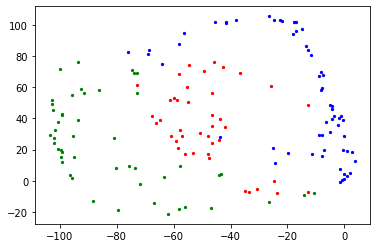

In [ ]:
plt.scatter(out_df.loc[out_df.label == 1,'x'],out_df.loc[out_df.label == 1,'y'], c= 'r',s=5)
plt.scatter(out_df.loc[out_df.label == 2,'x'],out_df.loc[out_df.label == 2,'y'], c= 'b',s=5)
plt.scatter(out_df.loc[out_df.label == 3,'x'],out_df.loc[out_df.label == 3,'y'], c= 'g',s=5)

In [ ]:
print(len(out_df))

240


In [ ]:
plt.scatter(df_spiral_test.loc[df_spiral.label == 0,'x'],df_spiral.loc[df_spiral.label == 0,'y'], c= 'r',s=5)
plt.scatter(df_spiral_test.loc[df_spiral.label == 1,'x'],df_spiral.loc[df_spiral.label == 1,'y'], c= 'b',s=5)

In [ ]:
X = torch.Tensor([[1,2,3],[2,3,4],[3,4,5]])
print(X[:,:2])

tensor([[1., 2.],
        [2., 3.],
        [3., 4.]])


In [ ]:
Y = torch.Tensor([[2,3,4],[2,3,4],[3,3,3]])

In [ ]:
#M_np[:,:X.shape]
loss2 = loss_fn(X, Y)

In [ ]:
print(loss2)

tensor(0.5833)


In [ ]:
x = [[1,2],[3,4],[4,3],[2,2]]
x_t = torch.Tensor(x)

p = x_t[:,:1]
print(p)

tensor([[1.],
        [3.],
        [4.],
        [2.]])


In [ ]:
x1 = [[1],[2],[2],[4]]
x1 = np.array(x1)
x2 = x1.flatten()
print(x2)

[1 2 2 4]


In [ ]:
X = "1228631 20 1231629 24 1234624 40 1237623 47 1240619 61 1243618 63 1246618 63 1249610 82 1252609 87 1255606 93 1258604 99 1261601 105 1264600 109 1267596 122 1270595 125 1273595 127 1276594 130 1279593 135 1282592 140 1285591 145 1288587 157 1291586 162 1294585 169 1297584 172 1300584 174 1303583 177 1306581 181 1309580 195 1309962 121 1312579 198 1312961 124 1315578 200 1315960 128 1318578 201 1318959 131 1321577 202 1321958 134 1324577 210 1324955 139 1327576 212 1327953 143 1330576 222 1330945 153 1333575 227 1333943 157 1336575 528 1339575 532 1342574 535 1345574 536 1348573 537 1351573 538 1354572 541 1357572 543 1360572 545 1363571 547 1366571 549 1369570 552 1372570 554 1375569 557 1378562 565 1381561 568 1384560 571 1387560 573 1390560 574 1393559 577 1396559 578 1399558 581 1402556 585 1405555 587 1408555 589 1411554 591 1414554 592 1417553 594 1420552 596 1423552 597 1426551 599 1429549 602 1432548 604 1435548 605 1438547 608 1441547 609 1444546 611 1447546 612 1450545 614 1453544 617 1456544 618 1459544 619 1462544 621 1465544 622 1468543 624 1471543 626 1474542 628 1477540 631 1480539 634 1483538 636 1486537 638 1489536 640 1492536 641 1495535 643 1498535 644 1501535 645 1504535 646 1507535 647 1510534 649 1513533 651 1516532 653 1519531 655 1522530 657 1525530 658 1528529 660 1531529 660 1534528 662 1537528 663 1540527 665 1543527 666 1546527 667 1549526 669 1552526 670 1555525 672 1558525 673 1561524 675 1564524 676 1567523 678 1570523 679 1573523 680 1576522 681 1579522 682 1582521 684 1585520 686 1588520 686 1591519 688 1594519 689 1597518 691 1600518 693 1603517 695 1606516 697 1609516 698 1612515 700 1615515 702 1618514 704 1621514 705 1624514 706 1627514 708 1630514 709 1633514 711 1636514 712 1639514 714 1642514 716 1645514 718 1648514 720 1651514 723 1654514 725 1657513 728 1660513 729 1663512 731 1666512 731 1669512 732 1672512 733 1675512 735 1678512 736 1681512 738 1684512 739 1687512 740 1690512 742 1693512 744 1696512 746 1699512 747 1702512 748 1705512 749 1708512 750 1711512 751 1714512 752 1717512 753 1720512 754 1723512 348 1723866 401 1726512 346 1726867 401 1729512 340 1729867 402 1732512 340 1732868 402 1735512 339 1735868 403 1738512 330 1738869 403 1741512 328 1741870 403 1744512 325 1744872 402 1747513 321 1747873 402 1750513 319 1750874 403 1753514 316 1753875 403 1756514 311 1756875 404 1759514 309 1759876 405 1762514 307 1762877 405 1765514 305 1765878 405 1768514 303 1768879 405 1771515 299 1771880 405 1774517 292 1774881 404 1777517 289 1777882 404 1780517 289 1780883 403 1783517 288 1783884 403 1786517 282 1786884 404 1789517 280 1789885 404 1792517 277 1792885 405 1795517 275 1795886 405 1798517 273 1798887 404 1801517 272 1801888 404 1804517 271 1804889 403 1807518 270 1807890 402 1810518 269 1810891 401 1813519 268 1813892 401 1816519 267 1816893 400 1819521 265 1819894 400 1822523 262 1822894 401 1825523 261 1825895 401 1828524 259 1828896 401 1831524 258 1831896 402 1834525 256 1834897 401 1837525 255 1837898 401 1840526 253 1840899 400 1843526 252 1843899 401 1846527 250 1846900 401 1849528 249 1849901 400 1852529 247 1852901 401 1855530 246 1855902 400 1858530 245 1858903 400 1861531 244 1861903 400 1864532 242 1864904 400 1867533 241 1867905 399 1870535 238 1870906 399 1873536 236 1873906 400 1876536 235 1876907 399 1879537 234 1879908 399 1882537 234 1882908 399 1885538 233 1885909 399 1888538 233 1888910 398 1891539 232 1891911 398 1894540 231 1894912 398 1897542 228 1897914 396 1900543 227 1900915 396 1903544 226 1903915 396 1906544 226 1906916 396 1909545 224 1909917 395 1912546 223 1912918 395 1915546 222 1915919 394 1918547 219 1918920 394 1921547 219 1921922 393 1924548 218 1924924 392 1927549 217 1927925 391 1930551 215 1930925 392 1933553 213 1933925 393 1936553 213 1936925 394 1939554 212 1939925 394 1942554 211 1942925 395 1945555 209 1945925 396 1948556 208 1948925 396 1951558 206 1951925 397 1954559 205 1954925 397 1957561 203 1957925 398 1960562 202 1960925 398 1963562 202 1963925 399 1966563 201 1966925 399 1969563 201 1969925 400 1972564 200 1972926 399 1975565 199 1975926 400 1978567 197 1978927 399 1981569 195 1981927 400 1984570 194 1984927 400 1987571 193 1987927 401 1990572 192 1990927 401 1993573 191 1993927 402 1996575 189 1996927 403 1999576 188 1999927 403 2002577 187 2002927 404 2005577 187 2005927 404 2008578 186 2008927 405 2011579 185 2011927 406 2014580 184 2014927 407 2017582 182 2017927 407 2020584 180 2020927 408 2023586 178 2023927 409 2026588 176 2026927 410 2029590 174 2029927 411 2032591 172 2032927 412 2035592 170 2035927 412 2038593 168 2038927 413 2041595 164 2041927 414 2044597 161 2044927 414 2047599 158 2047927 415 2050600 156 2050927 415 2053602 154 2053927 416 2056603 152 2056927 416 2059604 150 2059927 417 2062606 147 2062927 417 2065607 146 2065927 418 2068608 145 2068927 418 2071610 143 2071927 419 2074611 142 2074927 419 2077612 141 2077927 420 2080613 139 2080927 420 2083614 136 2083927 421 2086614 135 2086927 422 2089615 133 2089927 423 2092616 132 2092927 424 2095617 130 2095927 425 2098618 129 2098927 427 2101619 127 2101927 428 2104620 126 2104927 429 2107621 124 2107927 430 2110622 121 2110927 431 2113623 119 2113927 432 2116624 117 2116927 433 2119625 116 2119927 434 2122626 114 2122927 434 2125626 114 2125927 435 2128627 112 2128927 436 2131628 111 2131927 437 2134629 108 2134927 437 2137631 104 2137927 438 2140633 100 2140927 439 2143635 97 2143927 440 2146636 96 2146927 440 2149637 94 2149927 441 2152638 93 2152927 442 2155639 91 2155927 443 2158640 90 2158927 443 2161641 88 2161927 444 2164642 85 2164927 445 2167643 83 2167927 445 2170644 80 2170927 446 2173645 78 2173927 447 2176646 76 2176927 448 2179647 74 2179927 448 2182648 71 2182927 449 2185649 68 2185927 450 2188650 66 2188927 450 2191651 64 2191927 451 2194652 63 2194927 452 2197653 61 2197927 453 2200654 60 2200927 454 2203655 57 2203927 455 2206656 54 2206927 456 2209657 51 2209927 456 2212658 49 2212927 457 2215659 47 2215927 458 2218661 45 2218927 459 2221663 42 2221927 460 2224664 40 2224927 461 2227665 37 2227927 462 2230666 35 2230927 463 2233667 33 2233927 463 2236668 31 2236927 464 2239670 28 2239927 464 2242671 26 2242927 465 2245671 24 2245927 465 2248672 21 2248927 466 2251927 466 2254927 467 2257927 467 2260927 468 2263927 468 2266927 469 2269927 469 2272927 469 2275927 468 2278927 468 2281928 466 2284928 465 2287929 463 2290929 462 2293930 459 2296930 457 2299930 456 2302930 455 2305930 454 2308930 452 2311931 450 2314931 449 2317932 446 2320938 439 2323940 436 2326943 431 2329945 427 2332947 422 2335948 419 2338950 416 2341951 413 2344952 410 2347954 406 2350137 17 2350956 400 2353135 19 2353958 395 2356132 26 2356959 392 2359128 34 2359960 389 2362124 42 2362961 386 2365113 55 2365962 383 2368111 58 2368963 380 2371109 62 2371965 376 2374103 69 2374966 265 2375267 72 2377097 76 2377968 262 2378269 68 2380093 82 2380969 254 2381282 48 2383088 88 2383971 250 2384283 45 2386080 98 2386972 247 2387296 31 2389072 107 2389973 246 2390298 27 2392066 114 2392975 243 2393299 24 2395061 120 2395976 241 2398056 125 2398977 239 2401051 131 2401979 236 2404046 137 2404980 234 2407042 143 2407981 232 2410040 146 2410983 228 2413039 148 2413984 226 2416033 155 2416985 225 2419032 157 2419987 222 2422030 160 2422989 219 2425028 163 2425991 216 2428026 166 2428992 214 2431024 169 2431994 211 2434023 171 2434995 209 2437021 174 2437996 207 2440019 177 2440998 204 2443017 180 2443999 202 2446013 185 2447000 200 2449011 188 2450002 197 2452009 191 2453003 194 2455008 194 2456004 192 2458006 198 2459005 190 2461004 201 2462006 188 2464002 203 2465008 186 2467000 206 2468010 183 2469998 208 2471011 181 2472997 210 2474012 179 2475995 213 2477013 177 2478994 215 2480014 175 2481992 218 2483014 174 2484990 221 2486015 172 2487988 223 2489015 171 2490986 225 2492016 169 2493983 228 2495016 168 2496981 230 2498018 164 2499979 232 2501020 160 2502978 234 2504022 156 2505976 236 2507023 153 2508975 237 2510024 150 2511973 239 2513025 149 2514971 241 2516026 147 2517969 244 2519027 145 2520967 246 2522028 143 2523966 248 2525029 140 2526964 250 2528030 138 2529963 251 2531031 135 2532961 254 2534032 132 2535959 256 2537033 129 2538957 258 2540034 128 2541955 260 2543035 126 2544953 262 2546036 124 2547952 263 2549036 123 2550950 265 2552037 121 2553949 266 2555038 119 2556948 267 2558039 117 2559947 268 2561040 115 2562946 269 2564041 113 2565943 272 2567042 111 2568940 275 2570042 110 2571939 276 2573043 108 2574939 276 2576044 106 2577938 277 2579046 103 2580936 279 2582048 99 2583934 281 2585049 98 2586933 281 2588050 96 2589932 282 2591051 95 2592930 284 2594062 83 2595929 285 2597064 81 2598928 286 2600066 78 2601928 286 2603068 75 2604928 286 2606078 59 2607928 286 2609080 55 2610928 286 2612082 52 2613928 286 2615089 43 2616928 286 2618091 39 2619927 287 2621101 26 2622927 287 2624109 16 2625927 287 2628927 287 2631927 287 2634926 288 2637926 288 2640925 289 2643925 289 2646924 290 2649923 291 2652923 291 2655923 291 2658922 292 2661922 292 2664922 292 2667922 292 2670922 292 2673921 293 2676921 293 2679921 293 2682920 294 2685920 294 2688919 295 2691919 295 2694918 296 2697918 296 2700917 297 2703917 297 2706916 298 2709916 298 2712915 299 2715915 299 2718914 300 2721914 300 2724914 300 2727914 301 2730913 302 2733913 302 2736912 303 2739912 303 2742911 304 2745910 306 2748910 306 2751910 306 2754909 307 2757909 307 2760909 307 2763909 307 2766909 307 2769908 308 2772908 308 2775908 308 2778908 308 2781907 309 2784907 309 2787907 310 2790907 310 2793907 311 2796906 313 2799906 313 2802905 315 2805905 315 2808904 316 2811904 316 2814904 317 2817904 317 2820904 318 2823904 318 2826904 319 2829904 320 2832904 321 2835904 322 2838904 322 2841903 324 2844903 324 2847903 325 2850902 326 2853902 327 2856901 328 2859901 329 2862901 330 2865900 332 2868900 332 2871900 333 2874900 334 2877899 336 2880899 337 2883899 338 2886899 339 2889898 341 2892898 342 2895898 342 2898897 344 2901897 345 2904897 346 2907896 348 2910896 349 2913895 351 2916895 352 2919895 353 2922894 355 2925894 356 2928894 357 2931893 359 2934893 360 2937893 360 2940892 362 2943892 362 2946892 363 2949891 364 2952891 365 2955891 365 2958891 365 2961890 366 2964890 367 2967890 367 2970890 368 2973890 369 2976889 370 2979889 371 2982889 371 2985889 372 2988889 372 2991889 373 2994889 373 2997888 375 3000888 376 3003888 376 3006888 377 3009888 377 3012888 378 3015888 378 3018888 378 3021888 379 3024888 379 3027888 379 3030888 379 3033888 380 3036888 380 3039888 381 3042888 382 3045888 382 3048888 382 3051888 382 3054888 382 3057888 382 3060888 382 3063888 383 3066888 383 3069888 383 3072888 383 3075888 384 3078888 384 3081888 384 3084889 383 3087889 384 3090889 384 3093889 384 3096889 385 3099889 385 3102889 386 3105890 385 3108890 385 3111890 385 3114890 386 3117890 386 3120890 386 3123890 386 3126891 385 3129891 386 3132892 385 3135892 385 3138892 385 3141892 385 3144893 384 3147893 384 3150893 384 3153894 383 3156894 383 3159894 383 3162895 382 3165895 382 3168895 383 3171895 383 3174896 383 3177896 384 3180896 384 3183897 384 3186897 384 3189898 384 3192899 384 3195900 383 3198900 384 3199292 8 3201901 384 3202290 10 3204902 383 3205289 21 3207904 409 3210905 410 3213906 411 3216908 414 3219909 415 3222910 416 3225911 416 3228911 416 3231912 415 3234912 415 3237912 417 3240912 418 3243913 417 3246913 417 3249913 417 3252914 416 3255915 415 3258915 415 3261916 414 3264917 413 3267918 412 3270918 412 3273919 411 3276919 411 3279920 409 3282920 408 3285921 407 3288922 405 3291922 405 3294923 403 3297923 403 3300924 401 3303925 398 3306927 395 3309928 393 3312928 392 3315929 389 3318929 388 3321930 385 3324931 383 3327932 382 3330933 380 3333934 379 3336935 377 3339935 375 3342936 374 3345937 373 3348938 371 3351939 369 3354941 365 3357942 363 3360943 361 3363944 359 3366945 356 3369946 355 3372947 353 3375948 349 3378949 140 3379157 137 3381951 135 3382163 131 3384952 128 3385167 126 3387954 121 3388171 120 3390956 108 3391176 113 3393958 98 3394180 107 3396959 78 3397182 104 3399960 71 3400184 101 3402961 63 3403187 95 3405962 54 3406190 88 3408964 44 3409193 81 3411965 36 3412197 74 3414967 27 3415198 71 3417968 20 3420970 10 3690495 19 3693493 23 3696491 27 3699488 33 3702487 36 3705485 41 3708484 44 3711482 48 3714480 52 3717478 56 3720476 59 3723475 61 3726473 64 3729472 66 3732471 68 3735471 69 3738469 72 3741468 74 3744467 76 3747467 77 3750466 78 3753465 80 3756463 83 3759462 85 3762461 87 3765460 89 3768459 91 3771459 91 3774458 93 3777457 94 3780457 95 3783456 97 3786455 99 3789454 101 3792453 102 3795452 104 3798451 105 3801451 106 3804450 108 3807450 109 3810449 110 3813449 110 3816449 110 3819449 110 3822449 110 3825448 111 3828448 111 3831448 111 3834448 111 3837447 112 3840447 112 3843447 112 3846447 112 3849446 113 3852446 113 3855446 113 3858446 113 3861446 113 3864445 114 3867445 114 3870445 115 3873445 115 3876444 116 3879444 116 3882444 116 3885444 116 3888444 116 3891443 117 3894443 117 3897443 117 3900443 117 3903442 118 3906442 119 3909442 119 3912442 119 3915441 121 3918441 121 3921441 122 3924441 122 3927441 122 3930440 123 3933440 124 3936440 124 3939440 124 3942439 125 3945439 126 3948439 126 3951438 128 3954438 128 3957437 130 3960437 130 3963436 131 3966436 131 3969435 132 3972435 133 3975434 134 3978433 135 3981432 136 3984432 136 3987431 137 3990431 138 3993431 138 3996431 138 3999430 139 4002430 140 4005429 141 4008428 142 4011428 143 4014428 143 4017427 145 4020427 145 4023427 145 4026427 145 4029426 147 4032426 147 4035426 147 4038426 147 4041425 149 4044425 149 4047425 149 4050424 151 4053424 151 4056423 153 4059423 153 4062423 154 4065423 154 4068423 154 4071423 154 4074422 155 4077422 155 4080421 157 4083421 157 4086421 158 4089421 158 4092421 158 4095420 159 4098420 159 4101419 160 4104419 160 4107419 160 4110418 161 4113418 161 4116418 161 4119418 161 4122417 162 4125417 162 4128417 162 4131417 162 4134417 162 4137416 163 4140416 163 4143416 163 4146416 163 4149415 164 4152415 164 4155414 165 4158414 165 4161414 165 4164414 165 4167413 166 4170413 166 4173413 165 4176412 166 4179411 167 4182410 168 4185410 168 4188410 168 4191410 168 4194410 168 4197410 168 4200410 168 4203410 168 4206409 169 4209409 168 4212408 169 4215408 169 4218408 169 4221407 170 4224407 169 4227406 170 4230406 170 4233406 169 4236405 170 4239405 169 4242405 169 4245404 170 4248404 170 4251404 170 4254404 169 4257404 169 4260403 170 4263403 170 4266403 169 4269403 169 4272403 169 4275402 169 4278402 169 4281402 168 4284401 169 4287401 169 4290400 169 4293400 169 4296400 168 4299400 168 4302400 168 4305399 168 4308399 168 4311399 168 4314399 167 4317398 168 4320398 167 4323398 167 4326397 168 4329397 167 4332397 167 4335396 168 4338396 168 4341396 167 4344395 168 4347395 168 4350395 167 4353395 167 4356394 167 4359394 167 4362394 167 4365394 167 4368394 166 4371393 167 4374393 167 4377393 167 4380393 167 4383392 167 4386392 167 4389392 167 4392392 167 4395392 167 4398391 168 4401391 168 4404391 167 4407391 167 4410391 166 4413391 166 4416391 166 4419391 166 4422391 166 4425391 166 4428391 166 4431391 166 4434391 166 4437391 166 4440391 166 4443391 166 4446391 166 4449391 166 4452391 166 4455391 165 4458391 164 4461391 163 4464391 163 4467391 162 4470391 161 4473391 161 4476391 160 4479391 160 4482392 158 4485392 157 4488392 156 4491392 155 4494392 154 4497392 152 4500393 150 4503393 149 4506394 147 4509394 147 4512394 146 4515394 145 4518394 144 4521395 142 4524395 141 4527395 139 4530395 138 4533396 136 4536396 134 4539396 133 4542396 132 4545397 130 4548397 129 4551397 128 4554398 126 4557398 125 4560399 123 4563399 122 4566399 121 4569400 119 4572400 118 4575400 117 4578400 116 4581401 113 4584401 111 4587403 108 4590403 106 4593404 103 4596404 102 4599405 99 4602405 97 4605405 96 4608406 93 4611407 90 4614408 87 4617409 84 4620409 81 4622472 11 4623410 78 4625470 14 4626410 77 4628467 24 4629410 76 4631463 36 4632410 73 4634461 39 4635411 71 4637458 61 4638412 69 4640450 88 4641413 64 4643448 92 4644413 62 4646447 106 4647414 54 4649444 117 4650414 53 4652440 123 4653433 32 4655436 135 4658433 140 4661431 144 4664427 150 4667422 160 4670420 164 4673416 170 4676412 176 4679410 180 4682408 186 4685406 190 4688398 200 4691394 208 4694390 219 4697388 222 4700381 230 4703379 234 4706371 244 4709357 261 4712354 266 4715346 276 4718335 288 4721333 292 4724321 305 4727314 314 4730313 317 4733305 326 4736303 329 4739301 333 4742296 340 4745294 343 4748294 343 4751293 345 4754291 348 4757289 351 4760285 357 4763283 361 4766281 364 4769278 367 4772276 370 4775275 373 4778273 376 4781271 379 4784269 382 4787267 385 4790265 388 4793263 391 4796261 394 4799259 397 4802257 400 4805255 403 4808253 406 4811251 409 4814250 411 4817250 412 4820245 418 4823241 423 4826240 425 4829239 427 4832237 430 4835235 433 4838231 437 4841229 440 4844228 442 4847225 445 4850223 448 4853222 450 4856219 454 4859218 455 4862218 455 4865215 462 4868214 464 4871212 468 4874209 474 4877208 477 4880207 479 4883205 482 4886204 484 4889204 486 4892202 490 4895200 494 4898200 495 4901199 497 4904198 499 4907198 501 4910196 505 4913194 508 4916193 511 4919192 513 4922191 515 4925190 517 4928189 519 4931188 521 4934187 524 4937186 527 4940185 529 4943184 531 4946183 532 4949183 533 4952181 535 4955180 537 4958180 539 4961179 542 4964179 543 4967178 545 4970177 547 4973176 548 4976176 549 4979176 550 4982176 551 4985176 552 4988175 553 4991174 555 4994174 556 4997173 558 5000173 559 5003172 561 5006172 562 5009171 564 5012171 565 5015171 566 5018171 566 5021171 567 5024171 568 5027170 570 5030170 571 5033170 572 5036170 573 5039169 575 5042169 576 5045168 578 5048168 579 5051168 579 5054167 581 5057167 582 5060167 582 5063167 583 5066166 585 5069166 585 5072165 587 5075165 588 5078165 589 5081164 590 5084164 591 5087164 592 5090164 592 5093163 594 5096163 595 5099162 596 5102162 597 5105162 599 5108161 601 5111161 602 5114160 604 5117160 605 5120160 606 5123160 607 5126160 607 5129160 608 5132159 609 5135159 610 5138159 611 5141159 613 5144159 613 5147158 615 5150158 615 5153157 618 5156157 620 5159156 622 5162156 623 5165155 625 5168155 625 5171155 626 5174154 628 5177154 629 5180154 630 5183153 632 5186152 634 5189152 635 5192151 637 5195151 638 5198150 639 5201150 640 5204150 641 5207150 641 5210150 642 5213150 642 5216149 644 5219148 645 5222148 646 5225148 646 5228147 648 5231147 649 5234147 650 5237147 651 5240147 651 5243147 652 5246146 654 5249146 654 5252145 656 5255145 657 5258145 658 5261145 659 5264145 660 5267144 661 5270144 662 5273144 662 5276144 663 5279144 663 5282143 665 5285143 666 5288142 668 5291142 669 5294141 670 5297140 672 5300139 673 5303139 673 5306138 675 5309138 675 5312138 676 5315138 676 5318137 678 5321137 679 5324136 680 5327136 681 5330135 683 5333134 685 5336133 687 5339133 687 5342133 688 5345132 689 5348132 690 5351132 691 5354132 691 5357131 693 5360131 694 5363130 696 5366130 696 5369130 697 5372130 697 5375129 699 5378129 699 5381128 701 5384128 701 5387127 703 5390127 703 5393127 704 5396127 704 5399127 704 5402127 704 5405127 704 5408127 704 5411126 705 5414126 704 5417126 704 5420125 705 5423125 705 5426124 705 5429124 705 5432124 705 5435124 705 5438123 705 5441123 705 5444123 705 5447123 705 5450123 704 5453123 704 5456122 705 5459122 705 5462121 705 5465121 705 5468121 705 5471121 705 5474121 704 5477121 704 5480121 704 5483120 704 5486120 704 5489120 703 5492120 703 5495120 703 5498120 703 5501120 702 5504119 703 5507119 703 5510118 704 5513118 703 5516118 702 5519118 701 5522118 700 5525118 699 5528118 699 5531118 698 5534118 698 5537118 698 5540118 698 5543118 698 5546118 696 5549118 696 5552118 695 5555118 695 5558118 695 5561118 695 5564118 694 5567118 694 5570118 693 5573118 693 5576118 692 5579118 692 5582118 691 5585118 691 5588118 690 5591118 690 5594118 689 5597118 688 5600118 687 5603118 686 5606118 685 5609118 685 5612118 684 5615117 685 5618117 685 5621116 685 5624115 685 5627115 685 5630115 684 5633115 682 5636115 682 5639115 681 5642115 681 5645115 680 5648114 680 5651114 679 5654114 678 5657114 678 5660114 677 5663114 677 5666113 677 5669113 675 5672112 598 5672730 58 5675112 597 5675731 57 5678112 592 5678736 51 5681111 592 5681739 48 5684111 591 5684740 47 5687110 587 5687742 43 5690110 586 5690744 41 5693110 584 5693746 38 5696109 584 5696748 34 5699109 583 5699751 28 5702109 581 5702752 26 5705109 580 5705756 21 5708108 580 5708757 19 5711108 579 5714107 575 5717107 572 5720107 571 5723107 567 5726107 566 5729107 564 5732107 563 5735107 562 5738107 560 5741107 559 5744106 559 5747106 558 5750106 557 5753105 558 5756105 557 5759104 558 5762104 558 5765104 558 5768104 558 5771103 559 5774103 559 5777103 559 5780103 559 5783103 559 5786103 559 5789103 558 5792103 558 5795102 559 5798102 559 5801101 560 5804101 560 5807101 560 5810101 560 5813101 559 5816101 558 5819101 558 5822101 558 5825101 558 5828101 557 5831101 557 5834101 557 5837101 557 5840101 557 5843101 555 5846101 555 5849101 555 5852101 555 5855101 555 5858101 554 5861101 554 5864101 554 5867101 554 5870101 554 5873101 554 5876101 554 5879101 554 5882101 554 5885101 554 5888102 553 5891102 553 5894102 553 5897102 553 5900103 552 5903103 552 5906103 553 5909103 553 5912104 552 5915104 552 5918105 552 5921105 553 5924106 552 5927106 552 5930107 551 5933107 552 5936107 552 5939107 552 5942107 552 5945108 552 5948108 553 5951109 552 5954109 552 5957110 551 5960110 551 5963110 551 5966110 551 5969110 551 5972110 552 5975110 552 5978110 553 5981110 553 5984110 554 5987110 554 5990110 554 5993110 554 5996110 554 5999110 555 6002110 555 6005110 555 6008110 555 6011110 555 6014110 556 6017110 557 6020110 557 6023111 556 6026111 556 6029112 555 6032112 555 6035112 556 6038112 557 6041112 557 6044112 557 6047112 557 6050112 557 6053112 558 6056113 557 6059113 558 6062114 558 6065114 559 6068115 559 6071115 560 6074115 561 6077115 562 6080115 563 6083115 564 6086115 565 6089115 566 6092115 569 6095116 568 6098116 569 6101117 569 6104117 570 6107118 571 6110118 572 6113118 574 6116118 575 6119119 574 6122119 576 6125120 576 6128120 576 6131121 577 6134121 578 6137122 577 6140122 579 6143123 579 6146123 579 6149124 580 6152124 581 6155124 581 6158125 582 6161125 583 6164125 584 6167126 584 6170126 585 6173126 587 6176127 587 6179127 588 6182128 588 6185128 590 6188129 590 6191129 592 6194129 593 6197129 593 6200129 593 6203129 593 6206129 593 6209129 593 6212129 593 6215129 591 6218129 591 6221129 591 6224129 591 6227129 591 6230129 590 6233129 590 6236130 589 6239130 589 6242131 586 6245131 586 6248132 585 6251132 585 6254132 585 6257133 582 6260133 582 6263133 581 6266135 579 6269135 579 6272136 578 6275136 577 6278137 575 6281137 574 6284138 571 6287139 570 6290140 569 6293141 568 6296141 568 6299142 566 6302143 565 6305143 564 6308144 562 6311145 561 6314146 559 6317147 558 6320147 557 6323148 556 6326148 555 6329150 552 6332152 549 6335153 547 6338154 546 6341155 544 6344156 543 6347157 541 6350158 539 6353159 538 6356160 536 6359160 536 6362161 534 6365161 534 6368162 532 6371163 531 6374164 530 6377165 529 6380167 527 6383167 526 6386168 525 6389168 523 6392169 522 6395169 521 6398170 518 6401171 517 6404173 514 6407174 511 6410175 508 6413175 507 6416176 505 6419177 503 6422178 501 6425179 499 6428179 498 6431180 496 6434180 495 6437181 493 6440182 491 6443182 489 6446182 489 6449182 488 6452183 487 6455184 485 6458184 485 6461185 482 6464185 481 6467186 479 6470188 476 6473190 473 6476190 472 6479191 471 6482192 470 6485193 469 6488194 468 6491195 466 6494197 464 6497197 463 6500198 462 6503198 461 6506200 459 6509202 457 6512204 455 6515205 454 6518206 452 6521208 450 6524210 448 6527211 447 6530213 443 6533217 439 6536218 438 6539222 434 6542222 434 6545223 432 6548227 428 6551228 426 6554228 426 6557229 424 6560229 424 6563230 422 6566230 422 6569230 421 6572230 420 6575230 419 6578231 417 6581232 416 6584233 414 6587233 414 6590233 414 6593235 412 6596235 412 6599235 411 6602235 410 6605235 410 6608236 408 6611237 407 6614238 405 6617240 403 6620240 402 6623241 400 6626241 399 6629242 398 6632242 398 6635243 397 6638245 394 6641246 392 6644247 389 6647248 387 6650248 386 6653249 383 6656249 383 6659250 381 6662252 377 6665252 373 6668253 371 6671254 370 6674254 369 6677255 368 6680256 365 6683257 364 6686258 363 6689258 363 6692258 363 6695258 362 6698258 362 6701258 361 6704258 360 6707258 359 6710259 357 6713259 356 6716260 355 6719260 355 6722261 354 6725261 353 6728262 351 6731262 350 6734262 349 6737263 347 6740263 346 6743264 344 6746264 342 6749265 339 6752265 337 6755266 335 6758267 333 6761267 333 6764268 331 6767268 329 6770269 328 6773269 327 6776270 325 6779270 325 6782271 323 6785271 322 6788272 319 6791273 316 6794273 316 6797274 315 6800274 315 6803276 312 6806276 312 6809277 310 6812277 308 6815278 306 6818279 305 6821279 304 6824280 302 6827280 300 6830282 298 6833283 297 6836284 296 6839285 294 6842287 291 6845288 289 6848288 288 6851289 286 6854291 284 6857292 282 6860293 281 6863294 279 6866296 275 6869296 275 6872297 274 6875298 272 6878298 272 6881299 269 6884300 268 6887302 265 6890303 262 6893304 261 6896305 259 6899306 257 6902307 255 6905308 253 6908310 249 6911312 246 6914313 243 6917314 241 6920315 239 6923317 236 6926318 235 6929319 233 6932320 232 6935321 229 6938322 228 6941323 226 6944324 223 6947325 221 6950326 219 6953328 217 6956328 216 6959329 215 6962331 212 6965333 209 6968334 207 6971335 204 6974336 203 6977338 200 6980339 197 6983339 197 6986340 195 6989340 194 6992341 192 6995343 189 6998345 185 7001346 184 7004347 182 7007348 180 7010349 178 7013351 174 7016352 172 7019353 170 7022355 166 7025359 162 7028361 159 7031365 153 7034366 152 7037367 150 7040370 146 7043373 143 7046375 140 7049376 138 7052378 135 7055380 132 7058382 130 7061384 127 7064386 125 7067389 120 7070391 118 7073392 116 7076393 113 7079397 109 7082399 106 7085401 102 7088403 99 7091405 96 7094406 94 7097407 93 7100409 90 7103411 86 7106413 83 7109415 80 7112421 73 7115423 70 7118425 66 7121428 62 7124429 59"

In [ ]:
x_arr = X.split()

In [ ]:
print(x_arr)

['1228631', '20', '1231629', '24', '1234624', '40', '1237623', '47', '1240619', '61', '1243618', '63', '1246618', '63', '1249610', '82', '1252609', '87', '1255606', '93', '1258604', '99', '1261601', '105', '1264600', '109', '1267596', '122', '1270595', '125', '1273595', '127', '1276594', '130', '1279593', '135', '1282592', '140', '1285591', '145', '1288587', '157', '1291586', '162', '1294585', '169', '1297584', '172', '1300584', '174', '1303583', '177', '1306581', '181', '1309580', '195', '1309962', '121', '1312579', '198', '1312961', '124', '1315578', '200', '1315960', '128', '1318578', '201', '1318959', '131', '1321577', '202', '1321958', '134', '1324577', '210', '1324955', '139', '1327576', '212', '1327953', '143', '1330576', '222', '1330945', '153', '1333575', '227', '1333943', '157', '1336575', '528', '1339575', '532', '1342574', '535', '1345574', '536', '1348573', '537', '1351573', '538', '1354572', '541', '1357572', '543', '1360572', '545', '1363571', '547', '1366571', '549', '1